<h1 style="text-align: center;">Times Series Project</h1>

<h2 style="text-decoration: underline;">1. Chargement et nettoyage des données</h2>

<h3 style="text-decoration: underline;">1.1. Chargement des données</h3>

Notre jeu de données étant du type csv, on peut le charger avec la bibliothèque <i style="text-decoration: underline;">pandas</i> mais étant curieux,
on s'est permis de l'ouvrir pour voir le contenu et on s'est rendu compte que le jeu de données était illisible alors on se doit de le rendre lisible et utilisable.

In [12]:
# Chemin du fichier original et du fichier qu'on obtiendra
input_file = 'data_user.csv'
output_file = 'data_user_cleaned.csv'

# Lecture du fichier brut, nettoyage et écriture dans le nouveau format
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    # Lecture de la première ligne (en-tête) et nettoyage
    header = infile.readline().strip()
    header = header.replace('""', '')  # Enlever les guillemets doubles de l'en-tête
    header = header.replace('"', '')   # Enlever les guillemets restants
    outfile.write(header + '\n')
    # Traitement de chaque ligne de données
    for line in infile:
        # Enlever les guillemets doubles autour de chaque valeur
        reformatted_line = line.replace(',""', '","') # Remplace les guillemets doubles par un seul
        reformatted_line = reformatted_line.replace('"""','"') # Remplace les guillemets triples par un seul
        outfile.write(reformatted_line)

NB:

In [22]:
# importation des packages utiles
import pandas as pd
import numpy as np
import datetime as dt

In [43]:
# chargement de notre fichier CSV
df = pd.read_csv(output_file)

In [44]:
# Nombre de lignes et de colonnes de notre dataset
df.shape

(11260, 3)

In [45]:
# Afficher les premières lignes
df.head()

,@timestamp,system.memory.actual.used.bytes,system.memory.actual.used.pct
0,"Oct 19, 2024 @ 00:14:48.265","6,7GB","85,8%"
1,"Oct 19, 2024 @ 00:14:38.274","6,7GB","85,4%"
2,"Oct 19, 2024 @ 00:14:28.277","6,6GB","84,9%"
3,"Oct 19, 2024 @ 00:14:18.264","6,6GB","84,8%"
4,"Oct 19, 2024 @ 00:14:08.263","6,6GB","84,8%"


In [46]:
#changement du nom des colonnes
df.rename(columns={'@timestamp':'Time', 'system.memory.actual.used.bytes':'Used Memory GB', 'system.memory.actual.used.pct':'Used Memory %'}, inplace= True)

In [47]:
#les types de données
df.dtypes

Time              object
Used Memory GB    object
Used Memory %     object
dtype: object

Notre jeu de données nous montre que les types de données ne sont pas les bons donc on se doit de les changer

<h3 style="text-decoration: underline;">1.2. Nettoyage des données</h3>

On va verifier si notre jeu de données a des données manquantes, les traiter puis faire des changements si nécessaire

In [48]:
df.isna().sum()

Time                 0
Used Memory GB       0
Used Memory %     1160
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.isna().sum()

Time              0
Used Memory GB    0
Used Memory %     0
dtype: int64

In [51]:
# Suppression du caractère spécial '@' dans la colonne 'Time' et changement de type de données
df['Time'] = df['Time'].str.replace('@', '', regex=False).str.strip()
df['Time'] = pd.to_datetime(df['Time'], format='%b %d, %Y %H:%M:%S.%f')

In [54]:
# Suppression du suffixe "GB" et conversion en float
# Étape 1 : Remplacer la virgule par un point
df['Used Memory GB'] = df['Used Memory GB'].str.replace(',', '.', regex=False)
# Étape 2 : Supprimer le suffixe "GB"
df['Used Memory GB'] = df['Used Memory GB'].str.replace('GB', '', regex=False)
# Étape 3 : Convertir en float
df['Used Memory GB'] = df['Used Memory GB'].astype(float)

In [56]:
# Suppression du suffixe "%" et conversion en float
df['Used Memory %'] = df['Used Memory %'].str.replace(',', '.', regex=False)
df['Used Memory %'] = df['Used Memory %'].str.replace('%', '', regex=False)
df['Used Memory %'] = df['Used Memory %'].astype(float)

In [58]:
df.dtypes

Time              datetime64[ns]
Used Memory GB           float64
Used Memory %            float64
dtype: object

In [62]:
df.describe()

,Time,Used Memory GB,Used Memory %
count,10100,10100.000000,10100.000000
mean,2024-10-17 01:34:25.134193920,6.817842,87.297327
min,2024-10-15 08:42:14.673000,2.400000,30.900000
25%,2024-10-16 09:40:27.245750016,6.600000,85.000000
50%,2024-10-16 22:58:03.857499904,6.800000,87.000000
75%,2024-10-17 17:47:30.672000,7.100000,90.800000
max,2024-10-19 00:14:48.265000,7.600000,97.100000
std,NaN,0.333748,4.255119


<h2 style="text-decoration: underline;">2. Visualisation des Variables au cours du temps</h2>

<h3 style="text-decoration: underline;"> 2.1 Visualisation de l'utilisation de la mémoire en GB au cours du temps</h3>

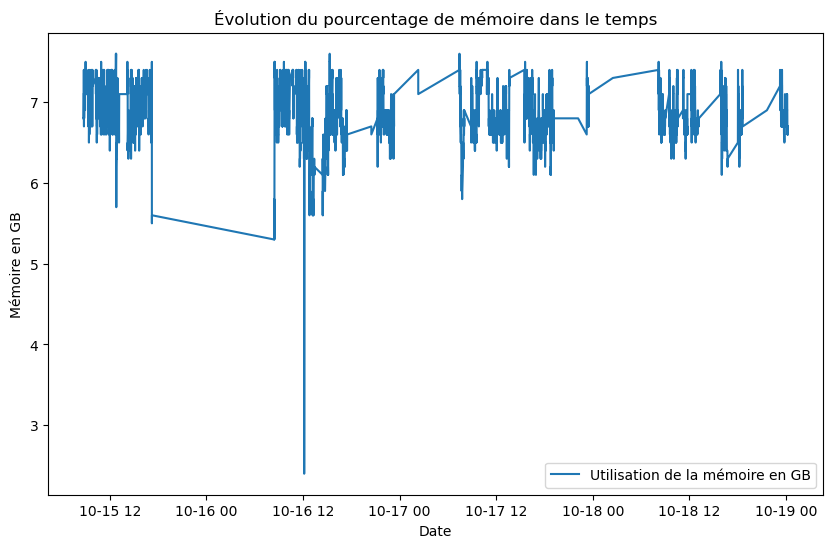

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='Used Memory GB', label='Utilisation de la mémoire en GB')
plt.title("Évolution du pourcentage de mémoire dans le temps")
plt.xlabel("Date")
plt.ylabel("Mémoire en GB")
plt.legend()
plt.show()

<h3 style="text-decoration: underline;"> 2.1 Visualisation de l'utilisation de la mémoire en % au cours du temps</h3>

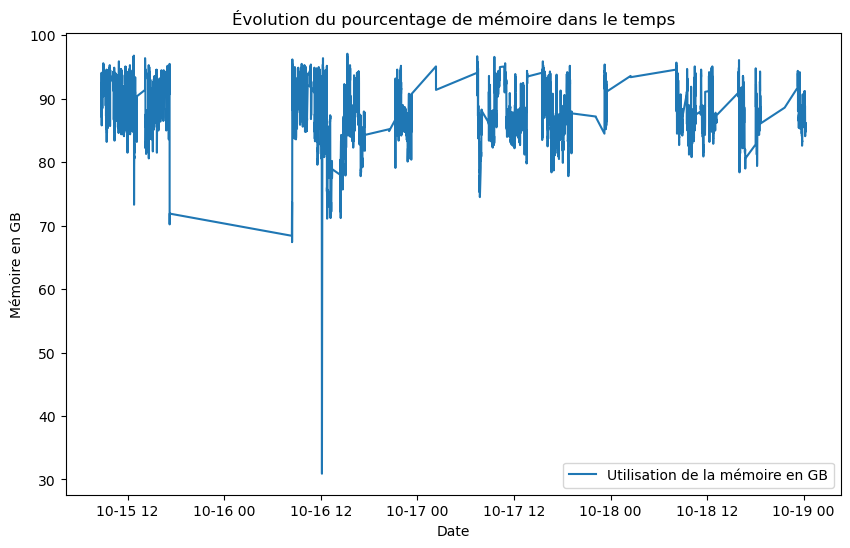

In [64]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='Used Memory %', label='Utilisation de la mémoire en GB')
plt.title("Évolution du pourcentage de mémoire dans le temps")
plt.xlabel("Date")
plt.ylabel("Mémoire en GB")
plt.legend()
plt.show()

<h2 style="text-decoration: underline;">3. Analyse des séries temporelles</h2>

Question: Ce jeu de données met-il en exergue des séries temporelles ?
Oui ce jeu de données le met en exergue car on constate une évolution au cours du temps de l'utilisation de la mémoire
à travers nos précedents visualisations.